In [75]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from StringIO import StringIO
import itertools

In [55]:
def prettify_ax(ax):
    """
    Nifty function we can use to make our axes more pleasant to look at
    """
    for spine in ax.spines.itervalues():
        spine.set_visible(False)
    ax.set_frameon=True
    ax.patch.set_facecolor('#eeeeef')
    ax.grid('on', color='w', linestyle='-', linewidth=1)
    ax.tick_params(direction='out')
    ax.set_axisbelow(True)
    
def simple_ax(figsize=(6,4), **kwargs):
    """
    Shortcut to make and 'prettify' a simple figure with 1 axis
    """
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, **kwargs)
    prettify_ax(ax)
    return fig, ax

In [92]:
data = StringIO("""CART,C4.5,RIPPER
0.001 0.003 0.01 0.03 0.1, 0.05 0.15 0.25 0.35 0.45,
0.70319 0.7073509 0.7073509 0.6920943 0.6782247,0.7073509 0.7018031 0.7018031 0.6976422 0.6962552,0.7032
13 7 7 3 2,7 10 10 25 34,7
""")

In [136]:
n_params = 5
idx = [("RIPPER", 0)] + list(itertools.product(["CART", "C4.5"], range(n_params)))
index = pd.MultiIndex.from_tuples(idx, names=["Alg", "Param_num"])

In [94]:
df = pd.read_csv(data)
df.index = ['Param', 'Accuracy', 'Sparsity']

In [189]:
split_df = df["RIPPER"]
for label in ["CART", "C4.5"]:
    split_row = df.ix[:, label].apply(lambda x: pd.Series(map(float, x.split())))
    split_row.columns = [label + '_' + str(i) for i in range(len(split_row.T))]
    split_df = pd.concat([split_df, split_row], axis=1)
#split_df.T.index=index
split_df = split_df.T
split_df.index = index
split_df

Param  Accuracy  Sparsity
Alg    Param_num                           
RIPPER 0            NaN  0.703200       7.0
CART   0          0.001  0.703190      13.0
       1          0.003  0.707351       7.0
       2          0.010  0.707351       7.0
       3          0.030  0.692094       3.0
       4          0.100  0.678225       2.0
C4.5   0          0.050  0.707351       7.0
       1          0.150  0.701803      10.0
       2          0.250  0.701803      10.0
       3          0.350  0.697642      25.0
       4          0.450  0.696255      34.0

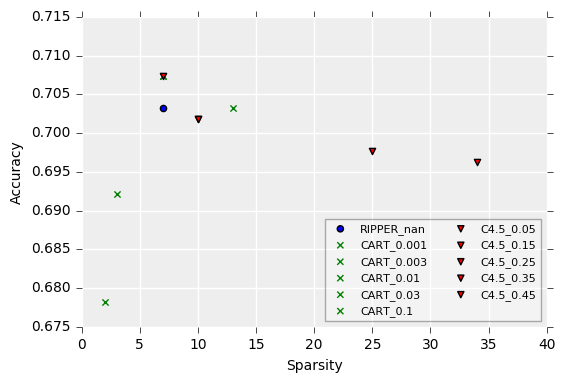

In [191]:
fig, ax = simple_ax()
colors = [0] + [1] * n_params + [2] * n_params
for name, vals in split_df.iterrows():
    if name[0] == "RIPPER":
        c, m = ('b', 'o')
    elif name[0] == "CART":
        c, m = ('g', 'x')
    elif name[0] == "C4.5":
        c, m = ('r', 'v')
    readable = name[0] + '_' + str(vals['Param'])
    ax.scatter(vals['Sparsity'], vals['Accuracy'], c=c, marker=m, label=readable)
plt.ylabel('Accuracy')
plt.xlabel('Model Size')
plt.legend(ncol=2, scatterpoints=1, loc='lower right', fontsize=8, framealpha=0.3)
plt.show()

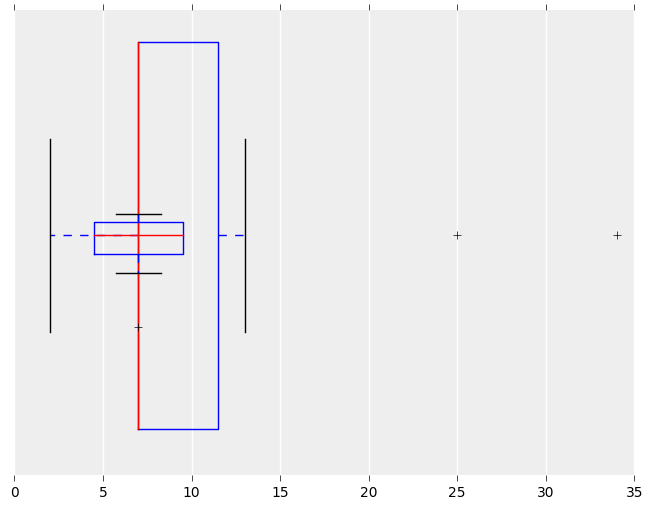

In [254]:
fig, ax = simple_ax(figsize=(8,6))
#ax.scatter(split_df['Sparsity'], split_df['Accuracy'])
ax.boxplot(split_df['Sparsity'],vert=False, widths=0.1, manage_xticks=False, positions=[split_df['Accuracy'].median()])
ax.boxplot(split_df['Accuracy'], widths=5, manage_xticks=False, positions=[split_df['Sparsity'].median()])
ax.set_xticks(np.arange(0, 40, 5))
ax.set_yticks(np.arange(0.6, 1, 5))
plt.show()

In [261]:
df = pd.read_csv('../eval/compas_sparsity.csv')
df.index = df['Method']
df['Fold'] = df['Fold'].apply(lambda x: x.split('_')[1])
df

,Fold,Method,C,cp,R,accuracy,leaves
Method,,,,,,,
CART,0,CART,0.00,0.001,0.000,0.703190,6
CART,0,CART,0.00,0.003,0.000,0.703190,6
CART,0,CART,0.00,0.010,0.000,0.703190,5
CART,0,CART,0.00,0.030,0.000,0.697642,3
CART,0,CART,0.00,0.100,0.000,0.678225,2
C4.5,0,C4.5,0.05,0.000,0.000,0.703190,6
C4.5,0,C4.5,0.15,0.000,0.000,0.703190,9
C4.5,0,C4.5,0.25,0.000,0.000,0.703190,9
C4.5,0,C4.5,0.35,0.000,0.000,0.707351,18


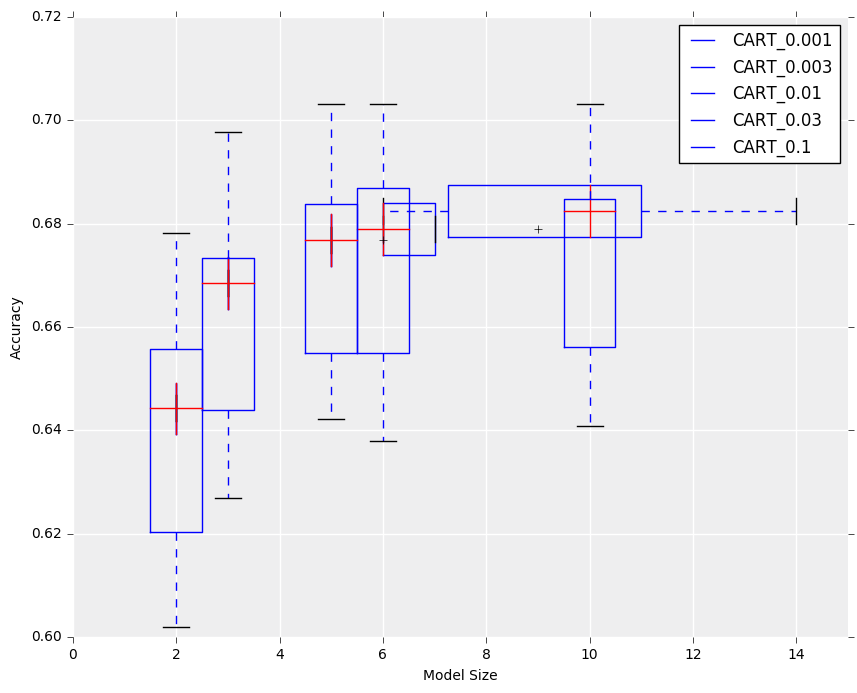

In [327]:
fig, ax = simple_ax(figsize=(10,8))
cart = df[df["Method"] == "CART"]
leaves = []
acc = []
a_meds = []
l_meds = []
for param in cart["cp"].unique():
    folds = cart[cart["cp"] == param]
    acc.append(folds['accuracy'])
    a_meds.append(folds['accuracy'].median())
    leaves.append(folds['leaves'])
    l_meds.append(folds['leaves'].median())
    #b = ax.boxplot(folds['accuracy'], widths=1, manage_xticks=False, positions=[folds['leaves'].median()])
    
#print leaves
ax.boxplot(leaves,vert=False, widths=0.01, manage_xticks=False, positions=a_meds)#, positions=[split_df['Accuracy'].median()])
b_dict = ax.boxplot(acc, widths=1, manage_xticks=False, positions=l_meds)
for b, param in zip(b_dict['boxes'], cart["cp"].unique()):
    b.set_label("CART_" + str(param))
#for method, row in df.iterrows():
#    print row["Method"]
    #ax.boxplot(row['leaves'],vert=False)#, widths=0.1, manage_xticks=False, positions=[split_df['Accuracy'].median()])
    #ax.boxplot(row['accuracy'])#, widths=5, manage_xticks=False, positions=[split_df['Sparsity'].median()])
ax.set_xlim([0, 15])
ax.set_xlabel('Model Size')
#ax.set_ylim([0.6, 1.3])
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

In [331]:
df

,Fold,Method,C,cp,R,accuracy,leaves
Method,,,,,,,
CART,0,CART,0.00,0.001,0.000,0.703190,6
CART,0,CART,0.00,0.003,0.000,0.703190,6
CART,0,CART,0.00,0.010,0.000,0.703190,5
CART,0,CART,0.00,0.030,0.000,0.697642,3
CART,0,CART,0.00,0.100,0.000,0.678225,2
C4.5,0,C4.5,0.05,0.000,0.000,0.703190,6
C4.5,0,C4.5,0.15,0.000,0.000,0.703190,9
C4.5,0,C4.5,0.25,0.000,0.000,0.703190,9
C4.5,0,C4.5,0.35,0.000,0.000,0.707351,18


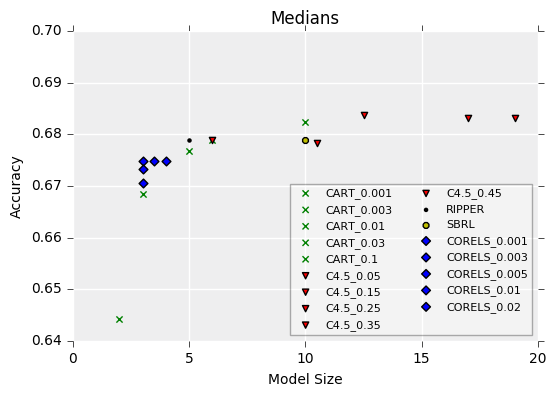

In [353]:
fig, ax = simple_ax(figsize=(6,4))
cart = df[df["Method"] == "CART"]

c, m = ('g', 'x')
for param in cart["cp"].unique():
    folds = cart[cart["cp"] == param]
    readable = 'CART_' + str(param)
    ax.scatter(folds['leaves'].median(), folds['accuracy'].median(), c=c, marker=m, label=readable)
    
c4 = df[df["Method"] == "C4.5"]
c, m = ('r', 'v')
for param in c4["C"].unique():
    folds = c4[c4["C"] == param]
    readable = 'C4.5_' + str(param)
    ax.scatter(folds['leaves'].median(), folds['accuracy'].median(), c=c, marker=m, label=readable)
    
ripper = df[df["Method"] == "RIPPER"]
c, m = ('k', '.')
readable = 'RIPPER'
ax.scatter(ripper['leaves'].median(), ripper['accuracy'].median(), c=c, marker=m, label=readable)

sbrl = df[df["Method"] == "SBRL"]
c, m = ('y', '8')
readable = 'SBRL'
ax.scatter(sbrl['leaves'].median(), sbrl['accuracy'].median(), c=c, marker=m, label=readable)

corels = df[df["Method"] == "CORELS"]
c, m = ('b', 'D')
for param in corels["R"].unique():
    folds = corels[corels["R"] == param]
    readable = 'CORELS_' + str(param)
    ax.scatter(folds['leaves'].median(), folds['accuracy'].median(), c=c, marker=m, label=readable)

#ax.set_xlim([0, 15])
ax.set_xlabel('Model Size')
#ax.set_ylim([0.6, 1.3])
ax.set_ylabel('Accuracy')
ax.legend(ncol=2, scatterpoints=1, loc='lower right', fontsize=8, framealpha=0.3)
ax.set_title('Medians')
plt.show()

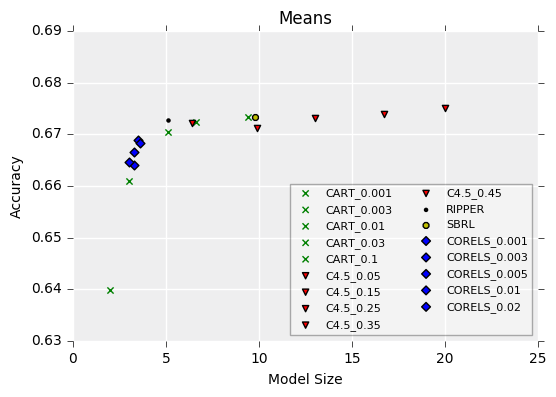

In [354]:
fig, ax = simple_ax(figsize=(6,4))
cart = df[df["Method"] == "CART"]

c, m = ('g', 'x')
for param in cart["cp"].unique():
    folds = cart[cart["cp"] == param]
    readable = 'CART_' + str(param)
    ax.scatter(folds['leaves'].mean(), folds['accuracy'].mean(), c=c, marker=m, label=readable)
    
c4 = df[df["Method"] == "C4.5"]
c, m = ('r', 'v')
for param in c4["C"].unique():
    folds = c4[c4["C"] == param]
    readable = 'C4.5_' + str(param)
    ax.scatter(folds['leaves'].mean(), folds['accuracy'].mean(), c=c, marker=m, label=readable)
    
ripper = df[df["Method"] == "RIPPER"]
c, m = ('k', '.')
readable = 'RIPPER'
ax.scatter(ripper['leaves'].mean(), ripper['accuracy'].mean(), c=c, marker=m, label=readable)

sbrl = df[df["Method"] == "SBRL"]
c, m = ('y', '8')
readable = 'SBRL'
ax.scatter(sbrl['leaves'].mean(), sbrl['accuracy'].mean(), c=c, marker=m, label=readable)

corels = df[df["Method"] == "CORELS"]
c, m = ('b', 'D')
for param in corels["R"].unique():
    folds = corels[corels["R"] == param]
    readable = 'CORELS_' + str(param)
    ax.scatter(folds['leaves'].mean(), folds['accuracy'].mean(), c=c, marker=m, label=readable)

#ax.set_xlim([0, 15])
ax.set_xlabel('Model Size')
#ax.set_ylim([0.6, 1.3])
ax.set_ylabel('Accuracy')
ax.legend(ncol=2, scatterpoints=1, loc='lower right', fontsize=8, framealpha=0.3)
ax.set_title('Means')
plt.show()

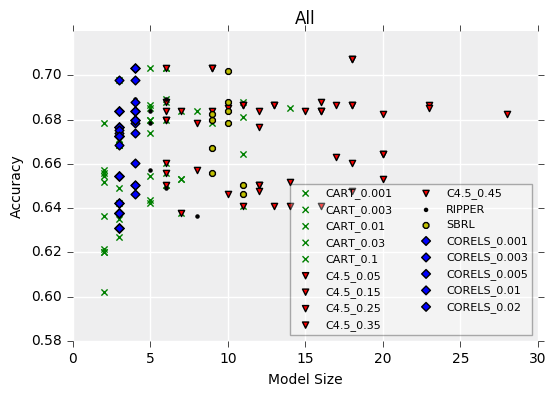

In [355]:
fig, ax = simple_ax(figsize=(6,4))
cart = df[df["Method"] == "CART"]

c, m = ('g', 'x')
for param in cart["cp"].unique():
    folds = cart[cart["cp"] == param]
    readable = 'CART_' + str(param)
    ax.scatter(folds['leaves'], folds['accuracy'], c=c, marker=m, label=readable)
    
c4 = df[df["Method"] == "C4.5"]
c, m = ('r', 'v')
for param in c4["C"].unique():
    folds = c4[c4["C"] == param]
    readable = 'C4.5_' + str(param)
    ax.scatter(folds['leaves'], folds['accuracy'], c=c, marker=m, label=readable)
    
ripper = df[df["Method"] == "RIPPER"]
c, m = ('k', '.')
readable = 'RIPPER'
ax.scatter(ripper['leaves'], ripper['accuracy'], c=c, marker=m, label=readable)

sbrl = df[df["Method"] == "SBRL"]
c, m = ('y', '8')
readable = 'SBRL'
ax.scatter(sbrl['leaves'], sbrl['accuracy'], c=c, marker=m, label=readable)

corels = df[df["Method"] == "CORELS"]
c, m = ('b', 'D')
for param in corels["R"].unique():
    folds = corels[corels["R"] == param]
    readable = 'CORELS_' + str(param)
    ax.scatter(folds['leaves'], folds['accuracy'], c=c, marker=m, label=readable)

#ax.set_xlim([0, 15])
ax.set_xlabel('Model Size')
#ax.set_ylim([0.6, 1.3])
ax.set_ylabel('Accuracy')
ax.legend(ncol=2, scatterpoints=1, loc='lower right', fontsize=8, framealpha=0.3)
ax.set_title('All')
plt.show()